number of instance:  1797
number of dimension:  64


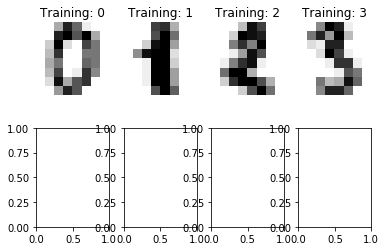

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

digits = datasets.load_digits()
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print('number of instance: ', data.shape[0])
print('number of dimension: ', data.shape[1])

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3,random_state = 10)

In [59]:
best_n = 0
nacc_knn  = 0
for n_neighbors in [1,3,5,7,9,11,13,15]:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    acc_knn = knn.score(X_test, y_test)
    print('when n_neighbors = ',n_neighbors,' knn accuracy: ', acc_knn)
    if nacc_knn<acc_knn:
        nacc_knn=acc_knn
        best_n = n_neighbors
print('best n = ',best_n)

when n_neighbors =  1  knn accuracy:  0.9907407407407407
when n_neighbors =  3  knn accuracy:  0.9907407407407407
when n_neighbors =  5  knn accuracy:  0.987037037037037
when n_neighbors =  7  knn accuracy:  0.9888888888888889
when n_neighbors =  9  knn accuracy:  0.9851851851851852
when n_neighbors =  11  knn accuracy:  0.9740740740740741
when n_neighbors =  13  knn accuracy:  0.9722222222222222
when n_neighbors =  15  knn accuracy:  0.9703703703703703
best n =  1


	可以看出KNN是一个比较稳定的算法，随着n的变化准确度变化不大。而对于这个样例、训练集而言，n越大准确度相对降低。

In [60]:
knn = KNeighborsClassifier(n_neighbors=best_n)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [61]:
best_acc = 0
best_com = 0
for n_components in [1,2,5,10,20,50]:
    pca = PCA(n_components=n_components).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    knn.fit(X_train_pca, y_train)
    acc_knn = knn.score(X_test_pca, y_test)
    print('when component = ',n_components,'knn accuracy using PCA: ', acc_knn)


when component =  1 knn accuracy using PCA:  0.29444444444444445
when component =  2 knn accuracy using PCA:  0.5685185185185185
when component =  5 knn accuracy using PCA:  0.8907407407407407
when component =  10 knn accuracy using PCA:  0.9833333333333333
when component =  20 knn accuracy using PCA:  0.987037037037037
when component =  50 knn accuracy using PCA:  0.9907407407407407


	n为特征维度数目，显然n越大准确度越高，但是我们降维的目的就是为了尽可能地使得维数更低，所以我们选择n=10继续实验

In [62]:
pca = PCA(n_components=10).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [63]:
predicted = knn.predict(X_test_pca)
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
plt.show()